# *Merged Jupyter Notebook*

<hr><font color="green"><h1>from file: 1_ExploringImagesData</h1></font>

# Predict Pneumonia with Chest X Ray Images Using a CNN

### Import required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import cv2
from PIL import Image

### Organizing the paths

In [5]:
#setting up the main folder

main_fol = r"C:\Users\iyers\Classes\PluralSight\ML_Content\Neural_Networks\ImageProcessing\CNN_for_ImageProcessing\implement-image-recognition-convolutional-neural-network\dataset\chest_xray\chest_xray"

In [6]:
#train, test folders

train_folder = os.path.join(main_fol, "train")
test_folder = os.path.join(main_fol, "test")


In [7]:
#pneumonia and normal image paths

pneumonia_train_images = glob.glob(train_folder+"/PNEUMONIA/*.jpeg")
normal_train_images = glob.glob(train_folder+"/NORMAL/*.jpeg")

pneumonia_test_images = glob.glob(test_folder+"/PNEUMONIA/*.jpeg")
normal_test_images = glob.glob(test_folder+"/NORMAL/*.jpeg")

In [8]:
#creating training and test dataframes

train_list = [x for x in normal_train_images]
train_list.extend([x for x in pneumonia_train_images])

df_train = pd.DataFrame(np.concatenate([["Normal"]*len(normal_train_images),
                                       ["Pneumonia"]*len(pneumonia_train_images)]), columns=["class"])
df_train["image"] = [x for x in train_list]

test_list = [x for x in normal_test_images]
test_list.extend([x for x in pneumonia_test_images])

df_test = pd.DataFrame(np.concatenate([["Normal"]*len(normal_test_images),
                                      ["Pneumonia"]*len(pneumonia_test_images)]), columns=["class"])
df_test["image"] = [x for x in test_list]

In [9]:
df_train

,class,image
0,Normal,C:\Users\iyers\Classes\PluralSight\ML_Content\...
1,Normal,C:\Users\iyers\Classes\PluralSight\ML_Content\...
2,Normal,C:\Users\iyers\Classes\PluralSight\ML_Content\...
3,Normal,C:\Users\iyers\Classes\PluralSight\ML_Content\...
4,Normal,C:\Users\iyers\Classes\PluralSight\ML_Content\...
...,...,...
5211,Pneumonia,C:\Users\iyers\Classes\PluralSight\ML_Content\...
5212,Pneumonia,C:\Users\iyers\Classes\PluralSight\ML_Content\...
5213,Pneumonia,C:\Users\iyers\Classes\PluralSight\ML_Content\...
5214,Pneumonia,C:\Users\iyers\Classes\PluralSight\ML_Content\...


In [10]:
df_test

,class,image
0,Normal,C:\Users\iyers\Classes\PluralSight\ML_Content\...
1,Normal,C:\Users\iyers\Classes\PluralSight\ML_Content\...
2,Normal,C:\Users\iyers\Classes\PluralSight\ML_Content\...
3,Normal,C:\Users\iyers\Classes\PluralSight\ML_Content\...
4,Normal,C:\Users\iyers\Classes\PluralSight\ML_Content\...
...,...,...
619,Pneumonia,C:\Users\iyers\Classes\PluralSight\ML_Content\...
620,Pneumonia,C:\Users\iyers\Classes\PluralSight\ML_Content\...
621,Pneumonia,C:\Users\iyers\Classes\PluralSight\ML_Content\...
622,Pneumonia,C:\Users\iyers\Classes\PluralSight\ML_Content\...


In [12]:
df_train

,class,image
0,Normal,C:\Users\iyers\Classes\PluralSight\ML_Content\...
1,Normal,C:\Users\iyers\Classes\PluralSight\ML_Content\...
2,Normal,C:\Users\iyers\Classes\PluralSight\ML_Content\...
3,Normal,C:\Users\iyers\Classes\PluralSight\ML_Content\...
4,Normal,C:\Users\iyers\Classes\PluralSight\ML_Content\...
...,...,...
5211,Pneumonia,C:\Users\iyers\Classes\PluralSight\ML_Content\...
5212,Pneumonia,C:\Users\iyers\Classes\PluralSight\ML_Content\...
5213,Pneumonia,C:\Users\iyers\Classes\PluralSight\ML_Content\...
5214,Pneumonia,C:\Users\iyers\Classes\PluralSight\ML_Content\...


### Exploring the dataset

TypeError: countplot() got multiple values for argument 'data'

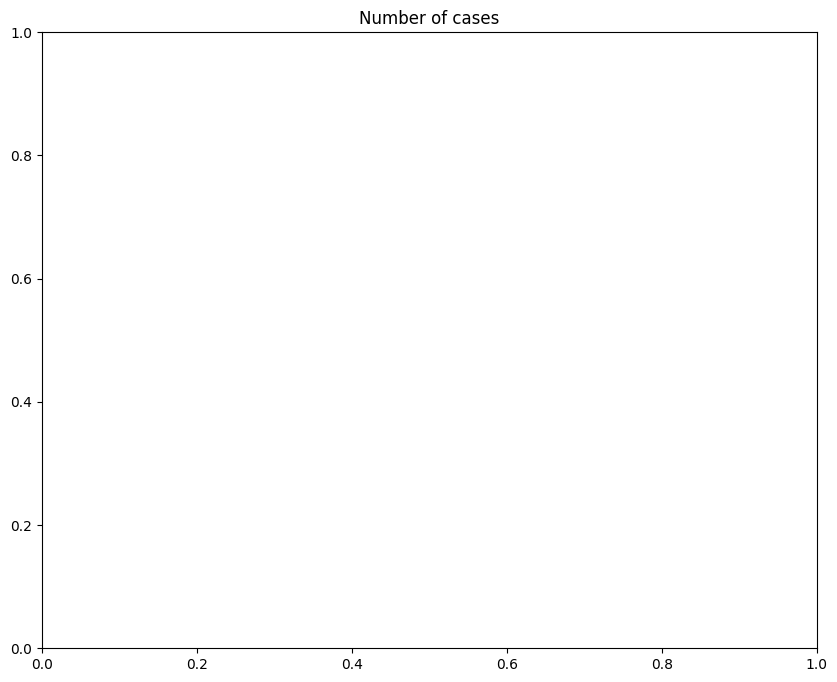

In [11]:
plt.figure(figsize=(10,8))

plt.title("Number of cases", fontsize=12)
sns.countplot(df_train["class"], data=df_train)

plt.show()

### Sample images

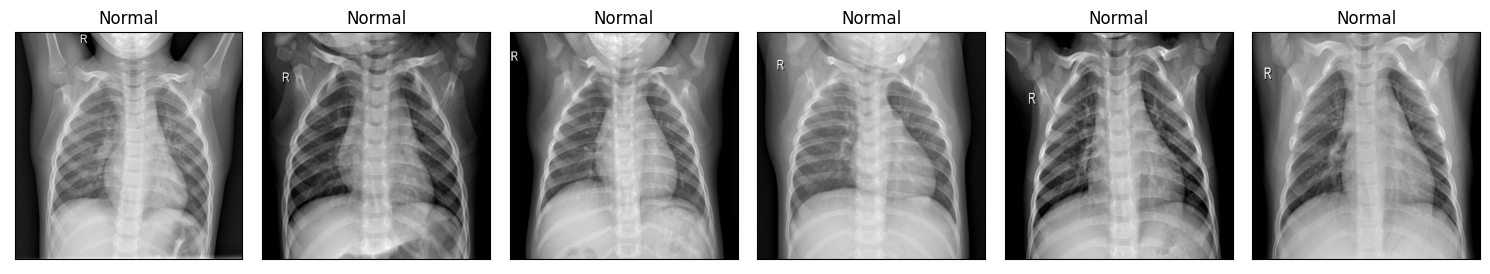

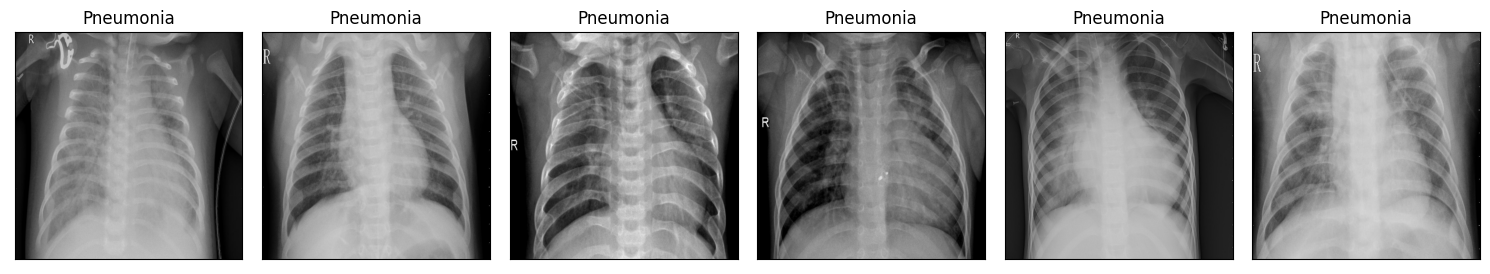

In [13]:
#normal images

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10))

for i, ax in enumerate(axes.flat):
    img = cv2.imread(normal_train_images[i])
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title("Normal")
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

#pneumonia images

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10))

for i, ax in enumerate(axes.flat):
    img = cv2.imread(pneumonia_train_images[i])
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title("Pneumonia")
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

### Data Preparation

In [14]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(
                rescale=1/255)

val_datagen = ImageDataGenerator(
                rescale=1/255)

In [20]:
train_generator = train_datagen.flow_from_dataframe(
                    train_df,
                    x_col="image",
                    y_col="class",
                    target_size=(150,150),
                    batch_size=32,
                    class_mode="binary",
                    seed=7)

Found 4172 validated image filenames belonging to 2 classes.


In [19]:
from sklearn.model_selection import train_test_split
train_df,val_df=train_test_split(df_train,test_size=0.2,random_state=13,stratify=df_train['class'])

In [21]:
val_generator = val_datagen.flow_from_dataframe(
                    val_df,
                    x_col="image",
                    y_col="class",
                    target_size=(150,150),
                    batch_size=32,
                    class_mode="binary",
                    seed=7)

test_generator = val_datagen.flow_from_dataframe(
                    df_test,
                    x_col="image",
                    y_col="class",
                    target_size=(150,150),
                    batch_size=32,
                    class_mode="binary",
                    shuffle=False,
                    seed=7)

Found 1044 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


<hr><font color="green"><h1>from file: 2_TrainingCNN</h1></font>

# Predict Pneumonia with Chest X Ray Images Using a CNN

### Import required libraries

In [23]:
#importing the necessary pacakages

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential

In [24]:
# building the cnn

model = Sequential()

#convolution
model.add(Conv2D(filters=16, kernel_size=(3,3), activation="relu", input_shape=(150,150,3)))

#pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd Conv
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))

#2nd pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd conv
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))

#3rd pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#flatten
model.add(Flatten())

#fully connected layer
model.add(Dense(64, activation="relu"))

model.add(Dense(1, activation="sigmoid"))

In [25]:
#compiling
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

The number of parameters are calculated like this:

**1. For Conv. Layers:**
   
   no. of parameters = output_channels * (input_channels * window_size + 1)
   
   
**2. For Dense Layers:**
    
   no. of parameters = output_size * (input_size + 1)

In [31]:
model_1 = model.fit(
                    train_generator,
                    epochs=3,
                    validation_data=val_generator)

Epoch 1/3
131/131 [==============================] - 62s 476ms/step - loss: 0.0645 - accuracy: 0.9803 - val_loss: 0.0801 - val_accuracy: 0.9732
Epoch 2/3
131/131 [==============================] - 64s 485ms/step - loss: 0.0538 - accuracy: 0.9818 - val_loss: 0.0696 - val_accuracy: 0.9818
Epoch 3/3
131/131 [==============================] - 62s 474ms/step - loss: 0.0451 - accuracy: 0.9856 - val_loss: 0.0747 - val_accuracy: 0.9780


NameError: name 'model_1' is not defined

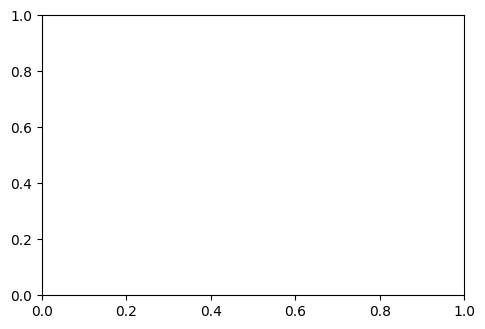

In [30]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(model_1.history["loss"], label="Training Loss")
plt.plot(model_1.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss Evolution")

plt.subplot(2,2,2)
plt.plot(model_1.history["accuracy"], label="Training Accuracy")
plt.plot(model_1.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Evolution")

plt.show()

### Performance Metrics

In [21]:
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

20/20 [==============================] - 7s 321ms/step - loss: 1.6982 - accuracy: 0.7724
Test Accuracy: 77.24%
131/131 [==============================] - 39s 301ms/step - loss: 0.0456 - accuracy: 0.9799
Train Accuracy: 97.99%


In [32]:
y_true = test_generator.classes
y_pred = (model.predict(test_generator) > 0.5).astype("int32")

20/20 [==============================] - 13s 657ms/step


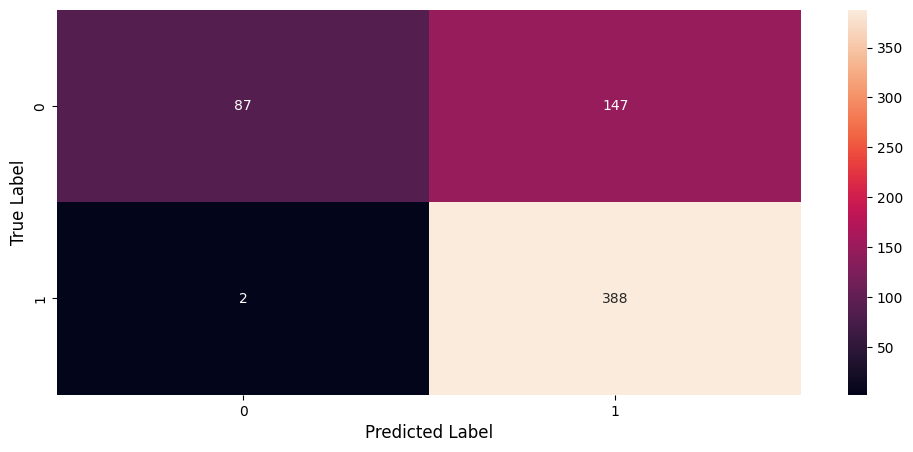

In [33]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,5))

confusion_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

plt.show()

In [35]:
# Precision, Recall and F1-Score of the model

tn, fp, fn, tp = confusion_matrix.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = (2*precision*recall/(precision+recall))

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print("F1-Score: {}".format(f1_score))

Recall of the model is 0.99
Precision of the model is 0.73
F1-Score: 0.838918918918919


# Predict Pneumonia with Chest X Ray Images Using a CNN

**Dataset Used** - https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

**Citation:**
Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification”, Mendeley Data, V2, doi: 10.17632/rscbjbr9sj.2

### Importing libraries for exploration

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import cv2
from PIL import Image

### Organizing the paths

In [ ]:
# setting main folder

main_fol = "data/chest_xray/"

In [ ]:
# train, test and val folders

train_folder = os.path.join(main_fol,"train")
test_folder = os.path.join(main_fol,"test")

In [ ]:
# pneumonia and normal image paths

pneumonia_train_images = glob.glob(train_folder+"/PNEUMONIA/*.jpeg")
normal_train_images = glob.glob(train_folder+"/NORMAL/*.jpeg")

pneumonia_test_images = glob.glob(test_folder+"/PNEUMONIA/*.jpeg")
normal_test_images = glob.glob(test_folder+"/NORMAL/*.jpeg")

In [ ]:
# creating traing and test dataframes

train_list = [x for x in normal_train_images]
train_list.extend([x for x in pneumonia_train_images])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(normal_train_images) , ['Pneumonia']*len(pneumonia_train_images)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in normal_test_images]
test_list.extend([x for x in pneumonia_test_images])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(normal_test_images) , ['Pneumonia']*len(pneumonia_test_images)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

In [ ]:
df_train

In [ ]:
df_test

### Exploratory data analysis

In [ ]:
plt.figure(figsize=(10,8))

plt.title('Number of cases', fontsize=12)
sns.countplot(df_train['class'], data=df_train)

plt.show()

### Sample Images

In [ ]:
# plotting some sample images

# normal images
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10))

for i, ax in enumerate(axes.flat):
    img = cv2.imread(normal_train_images[i])
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title("Normal")
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()    
plt.show()

#pneumonia images
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10))
for i, ax in enumerate(axes.flat):
    img = cv2.imread(pneumonia_train_images[i])
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title("Pneumonia")
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()    
plt.show()

### Data Preparation

In [ ]:
# splitting training and testing data

from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = 13, stratify = df_train['class'])

In [ ]:
val_df

### Preprocessing the dataset using ImageDataGenerator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
                rescale = 1/255)

val_datagen = ImageDataGenerator(
              rescale = 1/255)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col="image",
    y_col="class",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary",
    seed=7
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col="image",
    y_col="class",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary",
    seed=7
)

test_generator = val_datagen.flow_from_dataframe(
    df_test,
    x_col="image",
    y_col="class",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary",
    seed=7
)

### Model Architecture

In [ ]:
# importing the necessary packages
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential

In [ ]:
#building the CNN

model = Sequential()

# convolution
model.add(Conv2D(filters=16, kernel_size=(3,3), activation="relu", input_shape=(150,150,3)))

# pooling
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd conv
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))

# 2nd pooling
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd Conv
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# 3rd Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten layer
model.add(Flatten())

# fully connected layers
model.add(Dense(64, activation="relu"))

model.add(Dense(1, activation="sigmoid"))

In [ ]:
# compiling
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
model.summary()

The number of parameters are calculated like this:

**1. For Conv. Layers:**
   
   no. of parameters = output_channels * (input_channels * window_size + 1)
   
   
**2. For Dense Layers:**
    
   no. of parameters = output_size * (input_size + 1)

### Training the model

In [ ]:
# training the model and validation with testing data

cnn_model = model.fit(
            train_generator,
            epochs=10,
            validation_data=val_generator)

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(cnn_model.history['loss'], label='Training Loss')
plt.plot(cnn_model.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(cnn_model.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_model.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()

### Performance Metrics

In [ ]:
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

In [ ]:
y_true = test_generator.classes
y_pred = (model.predict(test_generator) > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,5))

confusion_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [ ]:
# Precision, Recall and F1-Score of the model

tn, fp, fn, tp = confusion_matrix.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = (2*precision*recall/(precision+recall))

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print('F1-score: {}'.format(f1_score))

### Image Augmentation

In [ ]:
train_datagen_2 = ImageDataGenerator(
                rescale = 1./255,
                shear_range = 0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                rotation_range=10,
                fill_mode="nearest")

val_datagen = ImageDataGenerator(
              rescale = 1./255)

In [ ]:
train_generator_2 = train_datagen_2.flow_from_dataframe(
    train_df,
    x_col="image",
    y_col="class",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary",
    seed=7
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col="image",
    y_col="class",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary",
    seed=7
)

test_generator = val_datagen.flow_from_dataframe(
    df_test,
    x_col="image",
    y_col="class",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary",
    seed=7,
    shuffle=False
)

### Hyperparameter tuning

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor="val_accuracy", factor=0.1, min_delta=0.0001, patience=1, verbose=1)

filepath="weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same",
                 input_shape=(150,150,3)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.6))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [ ]:
model.summary()

In [ ]:
# training the model

model_htuning = model.fit(
            train_generator_2,
            epochs=10,
            validation_data=val_generator,
            callbacks=[lr_reduce,checkpoint])

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(model_htuning.history['loss'], label='Training Loss')
plt.plot(model_htuning.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(model_htuning.history['accuracy'], label='Training Accuracy')
plt.plot(model_htuning.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()

In [ ]:
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_generator_2)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

In [ ]:
y_true = test_generator.classes
y_pred = (model.predict(test_generator) > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,5))

confusion_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [ ]:
# Precision, Recall and F1-Score of the model

tn, fp, fn, tp = confusion_matrix.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = (2*precision*recall/(precision+recall))

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print('F1-score: {}'.format(f1_score))

### Transfer Learning

In [ ]:
from tensorflow.keras.applications import ResNet152V2

In [ ]:
resnet_base_model = ResNet152V2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

resnet_base_model.summary()

In [ ]:
# transfer learning network

model_tl = Sequential()
model_tl.add(resnet_base_model)
model_tl.add(Flatten())

model_tl.add(Dense(1024,activation="relu"))
model_tl.add(BatchNormalization())
model_tl.add(Dropout(rate=0.5))

model_tl.add(Dense(128,activation="relu"))
model_tl.add(BatchNormalization())
model_tl.add(Dropout(rate=0.4))

model_tl.add(Dense(1, activation="sigmoid"))

In [ ]:
model_tl.summary()

In [ ]:
#freeze initial layers of the network
resnet_base_model.trainable = False

In [ ]:
model_tl.compile(loss="binary_crossentropy",
              optimizer=Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [ ]:
model_tl_final = model_tl.fit(
            train_generator_2,
            epochs=10,
            validation_data=val_generator,
            callbacks=[lr_reduce,checkpoint])

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(model_tl_final.history['loss'], label='Training Loss')
plt.plot(model_tl_final.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(model_tl_final.history['accuracy'], label='Training Accuracy')
plt.plot(model_tl_final.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()

In [ ]:
evaluation = model_tl.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model_tl.evaluate(train_generator_2)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

In [ ]:
y_true = test_generator.classes
y_pred = (model_tl.predict(test_generator) > 0.5).astype("int32")

from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,5))

confusion_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [ ]:
# Precision, Recall and F1-Score of the model

tn, fp, fn, tp = confusion_matrix.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = (2*precision*recall/(precision+recall))

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print('F1-score: {}'.format(f1_score))